<a href="https://colab.research.google.com/github/Animichael/spam_mail_prediction_using_SVC_LogisticsRegression_DecisionTree/blob/main/Email_spam_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Necessary Dependencies for the project

In [ ]:
import pandas as pd # for data manipulations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import numpy as np # algebraic
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # for model's performance evaluation
from sklearn.feature_extraction.text import TfidfVectorizer # used for text preprocessing
from sklearn.linear_model import LogisticRegression # machine learning algorithm  for binary classification tasks
from sklearn import svm # machine learning algorithm  for both regression and classification tasks
from sklearn.tree import DecisionTreeClassifier # algorithm for solving binary classification problem in data science

In [ ]:
# loading the email dataset into a variable name  (data)
mail_data =pd.read_csv('/content/drive/MyDrive/Datasets/mail_data.csv')

In [ ]:
# viewing the loaded dataset
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# let's find out how many rows and columns that we have in the dataset
mail_data.shape

(5572, 2)

The email dataset comprises of two columns only. The category and message columns.

In [ ]:
# let's check if there are missing values within the dataset
mail_data.isnull().sum().sum()

0

In [ ]:
# let's check for missing values in each of the columns specifically.
# First the category column
mail_data['Category'].isnull().sum()

0

In [ ]:
# The message column
mail_data['Message'].isnull().sum()

0

EDA: Let's Carryout Exploratory Data Analysis

In [ ]:
# let's check how many ham and spam mail exists in the dataset
mail_data.groupby('Category')['Category'].count()

Category
ham     4825
spam     747
Name: Category, dtype: int64

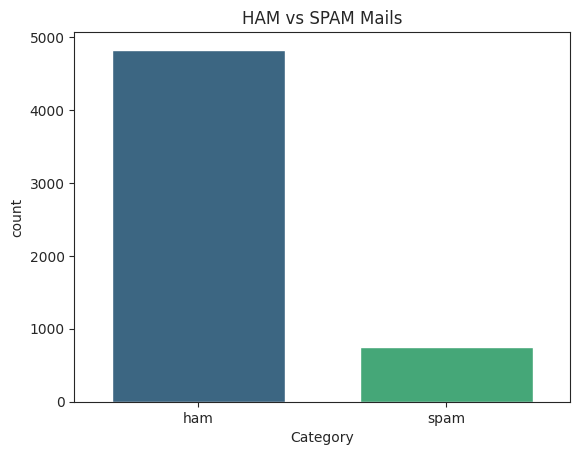

In [ ]:
# Let's visualize the reslut using countplot()
sns.set_style('ticks')
sns.countplot(x='Category', data=mail_data, width=0.7, palette='viridis', hue='Category')
plt.title('HAM vs SPAM Mails')
plt.show()

The chart above displays the total number of ham mail vs the spam mail. The ham mail in the dataset is 4825 and the spam mail is 747 as clearly illustrated in the countplot above.


Data Preprocessing

Since machine learning algorithm do not accept string data, we will convert the Category column into numerical values using lmapping technique.

In [ ]:
# Converting the category column to numerical values: ham==>>1 and spam==>0
mapping = {"ham": 1, "spam": 0}
# Convert categorical string values to numeric values using map() function
mail_data["Category"] = mail_data["Category"].map(mapping)

In [ ]:
# let's check if the category column as been successfully converted to numerical values(ham==>>1 and spam==>0)
mail_data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


We have successfully converted the category column into binary values (1 for ham mail and 0 for spam mail)

In [ ]:
# Now let's separate the dataset into label and text
x= mail_data['Message']
y= mail_data['Category']


In [ ]:
# let's print the values in x and y separately and see the content
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


Data Splitting

In [ ]:
# Now, let's split our x and y data into training and testing data using the train_test_split() function
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
# After the splitting, let's print the shape of the x_train, x_test and y_train, y_test
x_train.shape

(4457,)

In [ ]:
x_test.shape

(1115,)

In [ ]:
y_train.shape

(4457,)

In [ ]:
y_test.shape

(1115,)

In [ ]:
# Now, let us convert our text data stored in the variable x to numerical data using the TfidfVectorizer
param_to_covert_text= TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [ ]:
x_train_converted=param_to_covert_text.fit_transform(x_train)
x_test_converted=param_to_covert_text.transform(x_test)

Now, let's print the values in x_train_converted and x_test_converted as see if the values are converted into numberical data

In [ ]:
# Printing the value in x_train_converted
print(x_train_converted)

  (0, 5818)	0.22682143517864364
  (0, 2497)	0.2442158912653505
  (0, 694)	0.3171299579602537
  (0, 6264)	0.1898892037332199
  (0, 5800)	0.17558937755823417
  (0, 3262)	0.33791755486732394
  (0, 2049)	0.3034375179183143
  (0, 7300)	0.24288153842988894
  (0, 2724)	0.3544175987866074
  (0, 354)	0.3544175987866074
  (0, 7162)	0.2550284465664535
  (0, 258)	0.2379428657041507
  (0, 7222)	0.2173884735352799
  (0, 5512)	0.1898892037332199
  (1, 2555)	0.3840709491751004
  (1, 3804)	0.1902902346515268
  (1, 3932)	0.24325511357721427
  (1, 4509)	0.4028245991060671
  (1, 2440)	0.33870544648398715
  (1, 3333)	0.20665394084233096
  (1, 5650)	0.360444144470318
  (1, 2335)	0.2162321275166079
  (1, 6738)	0.28986069568918
  (1, 6109)	0.3239762634465801
  (1, 3267)	0.2678713077029217
  :	:
  (4452, 2438)	0.4574160733416501
  (4452, 7280)	0.3968991650168732
  (4452, 3978)	0.4574160733416501
  (4452, 3290)	0.26370969643076225
  (4452, 3084)	0.22948428918295163
  (4452, 2236)	0.2676662072392096
  (4453, 387

In [ ]:
# Printing the value in x_test_converted
print(x_test_converted)

  (0, 4942)	0.2260795967233104
  (0, 4100)	0.2783653715582127
  (0, 3955)	0.30969913392437864
  (0, 3395)	0.6599992933708911
  (0, 3225)	0.32999964668544557
  (0, 2173)	0.24736140852983116
  (0, 2065)	0.29632752800743906
  (0, 1751)	0.2863401438180079
  (1, 7158)	0.3981347747267476
  (1, 6986)	0.2493471978387002
  (1, 6642)	0.326271353777915
  (1, 6544)	0.2204999931204713
  (1, 5430)	0.387052012561607
  (1, 4044)	0.3234324946551934
  (1, 3443)	0.3234324946551934
  (1, 1975)	0.3578586983359201
  (1, 1361)	0.37034060973735533
  (2, 6570)	0.2671012270734155
  (2, 5597)	0.38473841792677693
  (2, 4369)	0.37140936745963093
  (2, 3510)	0.35262312595844614
  (2, 3084)	0.19302212472396826
  (2, 3067)	0.19302212472396826
  (2, 2377)	0.37140936745963093
  (2, 1292)	0.5530689808395817
  :	:
  (1110, 6142)	0.184212737624403
  (1110, 5204)	0.20379483330125558
  (1110, 4806)	0.21000774387718502
  (1110, 4497)	0.4617602822459726
  (1110, 4105)	0.19205506803469924
  (1110, 3938)	0.19408816272334495
  (

In [ ]:
# lets' convert the values in our y variable into integer. Although it's already in form of 0's and 1's but
# the system still reads it as string not integer
y_train=y_train.astype('int')
y_test=y_test.astype('int')

**Training the Decision Tree Classifier Model for Prediction**

In [ ]:
model1 =DecisionTreeClassifier()
model1.fit(x_train_converted,y_train )

DecisionTreeClassifier()

In [ ]:
# Carrying out prediction on the train data using the decision tree classifier
train_data_prediction=model1.predict(x_train_converted)

**Carrying Out Model's Performance Evaluation**

since this is a binary classification problem, we will use the accuracy score metrics to evaluate the accuaracy level of our machine learning model using the accuracy_score function that we imported in line 6 of this project.

In [ ]:
accuracy_decision_train = accuracy_score(y_train, train_data_prediction)
print('The accuracy for the training data using decision tress classifier is: ', accuracy_decision_train)

The accuracy for the training data using decision tress classifier is:  1.0


As we can see using the accuracy score to evaluate our model, it gives 1.0 as the percentage which means 100%. This is a very good model since its having 100% accuracy.Note: this is the accuracy result for the training data using the Descision Tree Classifier algorithm

In [ ]:
# now let's run cross validation on the model
# to ascertain if we will still obtain 100% accuracy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k = 5
scores = cross_val_score(model1, x_train_converted, y_train, cv=k)

print("The cross validation score for each fold is:", scores)

The cross validation score for each fold is: [0.97197309 0.94955157 0.96632997 0.95622896 0.9640853 ]


We can see that the cross validation score on the training data using the Decision Tree Classifier Algorithm for 5 Folds are: 97%, 94%, 96%, 95% and 96%. The result of the validation test although it's not 100% as the accuracy score metrics, still shows that the model is perfect for making good predictions.

In [ ]:
# Carrying out prediction on the test data using the decision tree classifier
test_data_prediction=model1.predict(x_test_converted)
accuracy_decision_test = accuracy_score(y_test, test_data_prediction)
print('The accuracy for the test data using decision tress classifier is: ', accuracy_decision_test)

The accuracy for the test data using decision tress classifier is:  0.9650224215246637


The result of the accuracy test on the test data shows 96%. This is an excellent score because the difference between this result and that of the training data is not much. However, in a situation where there is a big range between both scores it indicates that the model is over fitted.

Training the Support Vector Machine Classifier for Prediction

In [ ]:
model2= svm.SVC(kernel='poly')
model2.fit(x_train_converted,y_train)

SVC(kernel='poly')

In [ ]:
# Train data Prediction
model2_train_data_pred =model2.predict(x_train_converted)

accuracy_model2_train = accuracy_score(y_train, model2_train_data_pred)
print('The accuracy for the training data using support vector classifier is: ', accuracy_model2_train)

The accuracy for the training data using support vector classifier is:  1.0


The SVC model gives us 100% accuracy on the train data. This is also a perfect result. Since the result of the SVC is same as the Decision Tree Classifier, let's also run a validation test to see what the validation result will be for the SVC model.

In [ ]:
k = 6
valScores = cross_val_score(model2, x_train_converted, y_train, cv=k)

print("The cross validation score for each fold is:",valScores)

The cross validation score for each fold is: [0.92193809 0.92328398 0.93405114 0.91251682 0.9179004  0.91778976]


The cross validation result using the SVC model with k=6 gives the result of: 92%,92%,93%,91%,91% and 91% respectively. Machine learning with the Prediction accuracy of 90% and above is said to be acceptable for deployment. In our case, our model is perfectly trained

In [ ]:
# Test data prediction using the SVC
model2_test_data_pred=model2.predict(x_test_converted)
accuracy_model2_test = accuracy_score(y_test, model2_test_data_pred)
print('The accuracy for the test data using SVC model is:', accuracy_model2_test   )

The accuracy for the test data using SVC model is: 0.9452914798206278


The accuracy score for the test data using SVC algorithm is 94%. This is also perfect for Prediction.

Training the Model Using Logistic Regression Algorithm

In [ ]:
model3=LogisticRegression()
model3.fit(x_train_converted,y_train )

LogisticRegression()

In [ ]:
# Train data Prediction
model3_train_data_pred =model2.predict(x_train_converted)

accuracy_model3_train = accuracy_score(y_train, model3_train_data_pred)
print('The accuracy for the training data using logistic Regression is:',accuracy_model3_train)

The accuracy for the training data using logistic Regression is: 1.0


The accuracy score on the training dataset using logistic Regression is also 100%

In [ ]:
# let's also Carryout cross validation on the logistics Regression training set
k = 5
valScores2 = cross_val_score(model3, x_train_converted, y_train, cv=k)
print("The cross validation score for each fold is: ",valScores2)

The cross validation score for each fold is:  [0.95179372 0.93946188 0.94500561 0.94725028 0.93378227]


The result of the cross validation shows 95%, 93%, 94%, 94% and 93% respectively. This validation test affirms that our logistics Regression model is also capable of giving a desire Prediction when deployment for real life usage.

In [ ]:
#Test data prediction using the logistics Regression
model3_test_data_pred=model3.predict(x_test_converted)
accuracy_model3_test = accuracy_score(y_test, model3_test_data_pred)
print('The accuracy for the test data using logistic  Regression model is:', accuracy_model3_test   )

The accuracy for the test data using logistic  Regression model is: 0.967713004484305


Logistics Regression model gives accuracy of 96% on the test data. An excellent result.

Now let's compare the results of the three models. From our analysis, all the three Machine learning Algorithm used in training the dataset in this project (which are: Decision Tree Classifier,  SVC and Logistics Regression, )gives 100% accuracy on training data. While on test data, Decision tree classifier gives 96% accuracy, SVC gives 94% accuracy and logistic Regression gives 96% accuracy. Since Decision tree classifier and Logistic Regression are producing the best inaccuracies, we will employ one of these model in building a Predictive System

BUILDING A MODEL FOR MAKING PREDICTION

In [ ]:
email=["URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]
# Now let's transform the email to numeric data
email_input=param_to_covert_text.transform(email)

In [ ]:
# making Prediction
prediction =model3.predict(email_input)
if(prediction==1):
    print(f"The result of the prediction is {prediction}, its a Ham mail")
else:
    print(f"The result of the prediction is {prediction}, its a Spam mail")

The result of the prediction is [0], its a Spam mail


As we can see, our model is making the perfect Prediction as expected.